In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Simulate data for 1000 patients
n = 1000

# Create random demographic and health data
age = np.random.randint(18, 90, size=n)  # Age between 18 and 90
blood_pressure = np.random.randint(90, 180, size=n)  # Systolic BP between 90 and 180
heart_rate = np.random.randint(60, 100, size=n)  # Heart rate between 60 and 100
glucose = np.random.randint(70, 180, size=n)  # Glucose levels between 70 and 180
cholesterol = np.random.randint(150, 250, size=n)  # Cholesterol levels between 150 and 250
body_mass_index = np.random.uniform(18.5, 35, size=n)  # BMI between 18.5 and 35

# Create a target variable (disease risk) based on some logic
# 0 = No disease, 1 = Disease (randomly assigning for simulation)
target = np.random.randint(0, 2, size=n)

# Create the DataFrame
data = pd.DataFrame({
    'age': age,
    'blood_pressure': blood_pressure,
    'heart_rate': heart_rate,
    'glucose': glucose,
    'cholesterol': cholesterol,
    'body_mass_index': body_mass_index,
    'target': target  # 0 or 1, indicating the presence of disease
})

# Save the DataFrame to a CSV file
data.to_csv('patient_data.csv', index=False)

# Display the first few rows
print(data.head())


   age  blood_pressure  heart_rate  glucose  cholesterol  body_mass_index  \
0   69              96          84       99          219        30.647957   
1   32              97          61      129          155        26.962801   
2   89             154          94      177          233        32.848500   
3   78             146          66      167          201        25.145801   
4   38             156          80      101          152        34.508883   

   target  
0       0  
1       1  
2       0  
3       1  
4       0  


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('patient_data.csv')

# Display the first few rows
print(data.head())


   age  blood_pressure  heart_rate  glucose  cholesterol  body_mass_index  \
0   69              96          84       99          219        30.647957   
1   32              97          61      129          155        26.962801   
2   89             154          94      177          233        32.848500   
3   78             146          66      167          201        25.145801   
4   38             156          80      101          152        34.508883   

   target  
0       0  
1       1  
2       0  
3       1  
4       0  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values (replace with mean)
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Select features (X) and target (y)
X = data_filled.drop('target', axis=1)  # 'target' is the disease label
y = data_filled['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


C:\Users\yamini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4716 - loss: 0.7043 - val_accuracy: 0.4563 - val_loss: 0.6994
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5204 - loss: 0.6873 - val_accuracy: 0.4625 - val_loss: 0.6965
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 0.6854 - val_accuracy: 0.4375 - val_loss: 0.6962
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5464 - loss: 0.6825 - val_accuracy: 0.4625 - val_loss: 0.6943
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5342 - loss: 0.6852 - val_accuracy: 0.5188 - val_loss: 0.6952
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5721 - loss: 0.6804 - val_accuracy: 0.5250 - val_loss: 0.6957
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5908 - loss: 0.6739 - val_accuracy: 0.5000 - val_loss: 0.7006
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 0.6787 - val_accuracy: 0.4938 - val_loss

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4185 - loss: 0.7023 
Test Loss: 0.689086377620697
Test Accuracy: 0.4650000035762787


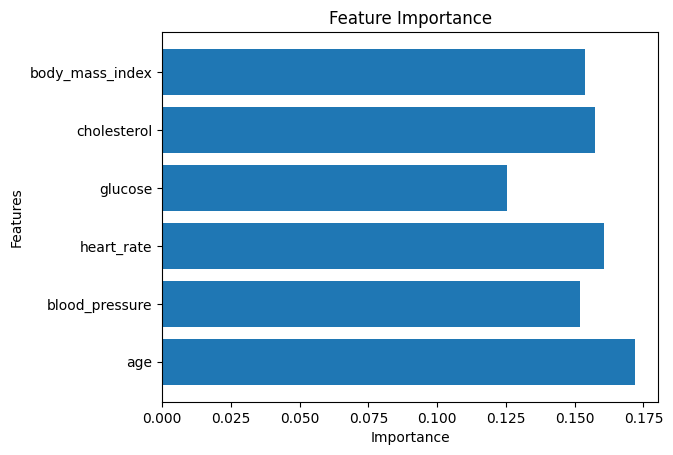

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights from the trained model
weights = model.layers[0].get_weights()[0]  # First layer weights

# Get feature names (assuming you have the column names)
features = X.columns

# Calculate feature importance by taking the absolute value of the weights
feature_importance = np.abs(weights).mean(axis=1)

# Plot feature importance
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [7]:
import numpy as np

# Example new patient data with all required features
# The order should be: age, blood_pressure, heart_rate, glucose, cholesterol, body_mass_index
# I will add example values for cholesterol and body_mass_index.
new_patient_data = np.array([[45, 120, 80, 120, 200, 25.5]])  # Example data with all 6 features

# Ensure that the scaler was fitted on the training data before calling transform
new_patient_data_scaled = scaler.transform(new_patient_data)

# Predict the disease risk (binary output: 0 or 1)
prediction = model.predict(new_patient_data_scaled)

# Output the prediction
print(f'Disease Risk: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Disease Risk: 0.5315394401550293


C:\Users\yamini\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━

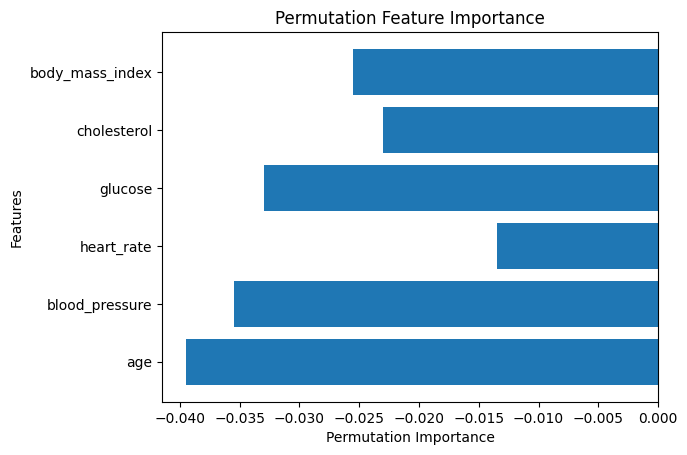

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, make_scorer

# Define a custom scoring function for Keras model
def keras_accuracy(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5))  # For binary classification, threshold at 0.5

# Create a scorer from the custom accuracy function
custom_scorer = make_scorer(keras_accuracy)

# Calculate permutation importance with the custom scorer
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring=custom_scorer)

# Plot the results
features = ['age', 'blood_pressure', 'heart_rate', 'glucose', 'cholesterol', 'body_mass_index']  # List of feature names
plt.barh(features, result.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()
